## Visualizando letras populares

## Bibliotecas

In [4]:
from src import retrieve
from src import visualize
import pandas as pd
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop = set(stopwords.words('portuguese'))

[nltk_data] Downloading package stopwords to /home/tayna/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Nesse dicionário estão os títulos e artistas das letras que queremos visualizar

In [5]:
song_dict = {
    "Dúvida Cruel":"Chico Cesar",
    "Mama Africa":"Chico Cesar", 
    "Pensar em Você":"Chico Cesar",
    "Sirimbó":"Chico Cesar",
    "Respeitem meus cabelos brancos":"Chico Cesar",
    "Pétala por Pétala":"Chico Cesar",
    "De uns tempos pra cá":"Chico Cesar",
    #"Abaeté, Abaiacu e Namorado":"Chico Cesar",
    "Estado de Poesia":"Chico Cesar",
    "Minha Morena":"Chico Cesar"
}

## Aquisição das letras

Buscaremos as músicas com a função *songs_to_dataframe* com minha chave. 

Para criar a sua chave, crie um [login no Vagalume](https://meu.vagalume.com.br) e [siga para esta página](https://auth.vagalume.com.br/settings/api/).

In [6]:
song_df = retrieve.songs_to_dataframe(song_dict = song_dict, 
                                      chave="") #adicione sua chave aqui

Buscando música "Dúvida Cruel" de Chico Cesar...
Buscando música "Mama Africa" de Chico Cesar...
Buscando música "Pensar em Você" de Chico Cesar...
Buscando música "Sirimbó" de Chico Cesar...
Buscando música "Respeitem meus cabelos brancos" de Chico Cesar...
Buscando música "Pétala por Pétala" de Chico Cesar...
Buscando música "De uns tempos pra cá" de Chico Cesar...
Buscando música "Estado de Poesia" de Chico Cesar...
Buscando música "Minha Morena" de Chico Cesar...


Assim fica o dataframe:

In [7]:
song_df.head()

,artista,id_artista,url_artista,titulo,letra,idioma,url,id_musica,album,id_album,url_album,capa_album,ano_album
0,Chico Cesar,3ade68b5g8fd7eda3,https://www.vagalume.com.br/chico-cesar/,Dúvida Cruel,no meu cérebro crepita\n\numa dúvida martelo\n...,Português (BR),https://www.vagalume.com.br/chico-cesar/duvida...,3ade68b7g14d58ea3,Aos Vivos,3ade68b6g0ab4fda3,https://www.vagalume.com.br/chico-cesar/discog...,https://www.vagalume.com.br/chico-cesar/discog...,1995
1,Chico Cesar,3ade68b5g8fd7eda3,https://www.vagalume.com.br/chico-cesar/,Mama África,"Mama África, \na minha mãe é mãe solteira\ne t...",Português (BR),https://www.vagalume.com.br/chico-cesar/mama-a...,3ade68b6g8dc1fda3,Cuscuz Clã,3ade68b6g7a1bfda3,https://www.vagalume.com.br/chico-cesar/discog...,https://www.vagalume.com.br/chico-cesar/discog...,1996
2,Chico Cesar,3ade68b5g8fd7eda3,https://www.vagalume.com.br/chico-cesar/,Pensar em Você,É só pensar em você\nQue muda o dia\nMinha ale...,Português (BR),https://www.vagalume.com.br/chico-cesar/pensar...,3ade68b6gcdc1fda3,Mama Mundi,3ade68b6g6a1bfda3,https://www.vagalume.com.br/chico-cesar/discog...,https://www.vagalume.com.br/chico-cesar/discog...,1999
3,Chico Cesar,3ade68b5g8fd7eda3,https://www.vagalume.com.br/chico-cesar/,Sirimbó,Para dançar sirimbó\nArriba a saia meu bem sir...,Português (BR),https://www.vagalume.com.br/chico-cesar/sirimb...,3ade68b7ga9dd7ea3,Cuscuz Clã,3ade68b6g7a1bfda3,https://www.vagalume.com.br/chico-cesar/discog...,https://www.vagalume.com.br/chico-cesar/discog...,1996
4,Chico Cesar,3ade68b5g8fd7eda3,https://www.vagalume.com.br/chico-cesar/,"Respeitem Meus Cabelos, Brancos","Respeitem meus cabelos, brancos\nChegou a hora...",Português (BR),https://www.vagalume.com.br/chico-cesar/respei...,3ade68b8ged9cfea3,Novo Millennium: Chico Cesar,3ade68b6gf9b4fda3,https://www.vagalume.com.br/chico-cesar/discog...,https://www.vagalume.com.br/chico-cesar/discog...,2005


## Correção

O link de capa do álbum, que será importante para a visualização, não está funcionando. Veja um exemplo:

In [8]:
retrieve.testa_link(song_df.iloc[0].capa_album)

https://www.vagalume.com.br/chico-cesar/discografia/aos-vivos-11-W125.jpg
Código do Erro:  404


Contudo, ao usar o link do album (*url_album*) consegui encontrar a capa e percebi que do link do álbum para a capa, o que muda é o final da url. Usando disso, então fiz:

In [9]:
song_df['url_album_capa'] = song_df.url_album.str.replace('html','webp')
retrieve.testa_link(song_df.iloc[0].url_album_capa)

https://www.vagalume.com.br/chico-cesar/discografia/aos-vivos-11.webp
O link funciona!


Então é esse o link que vou usar na visualização

## Visualização das letras

In [10]:
#for index, row in song_df.iterrows():
#    visualize.cria_imagem_nuvem(row.letra, row.url_album_capa, stop)

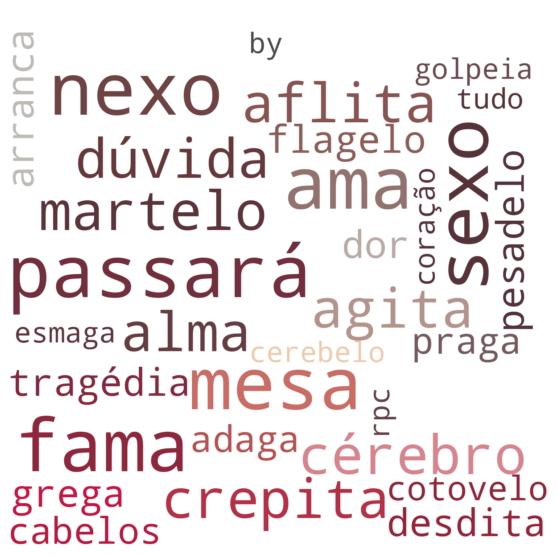

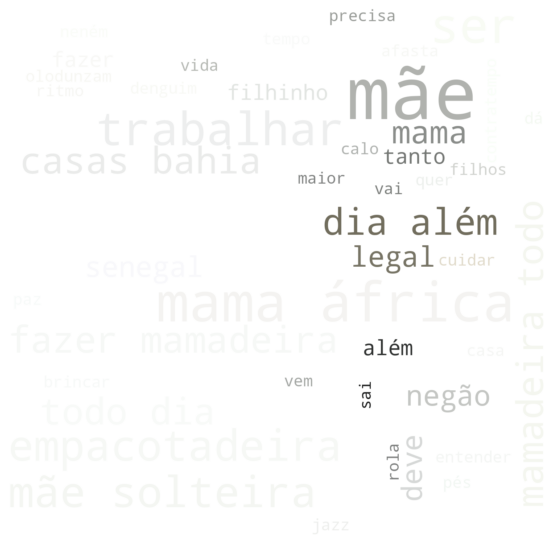

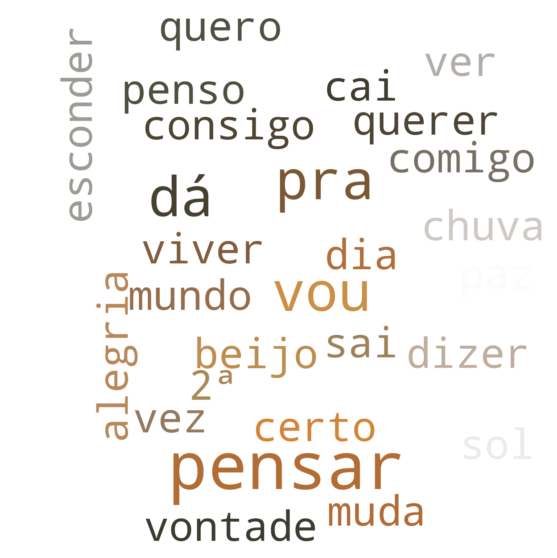

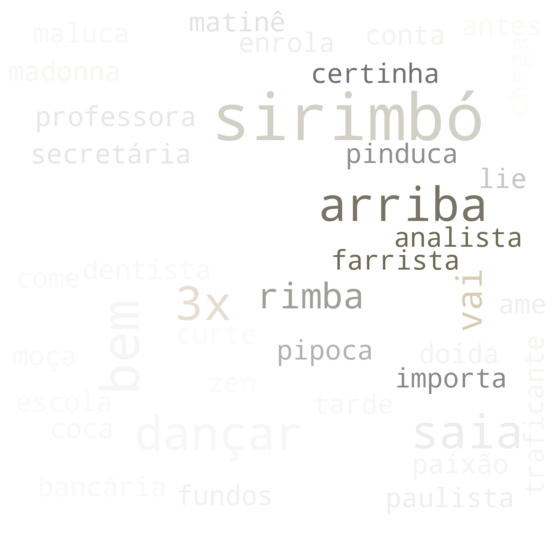

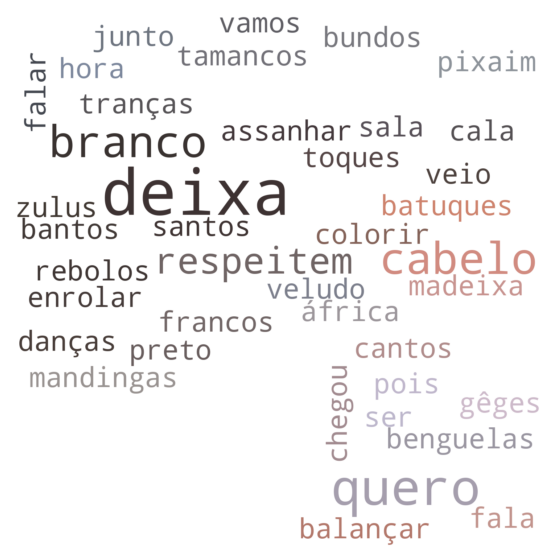

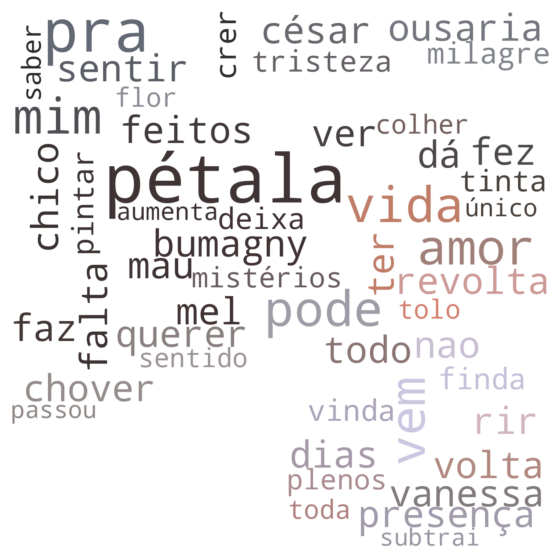

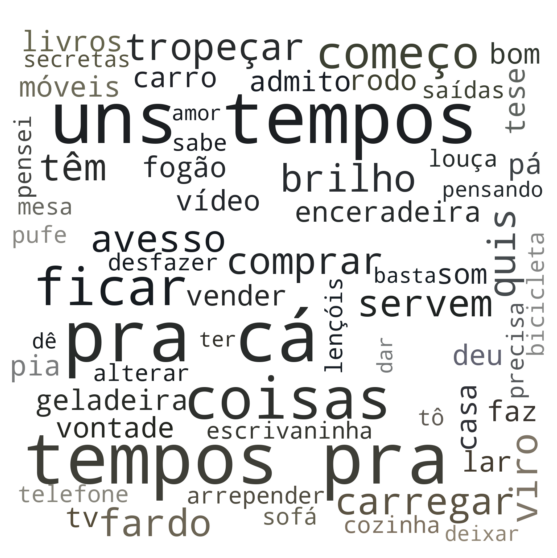

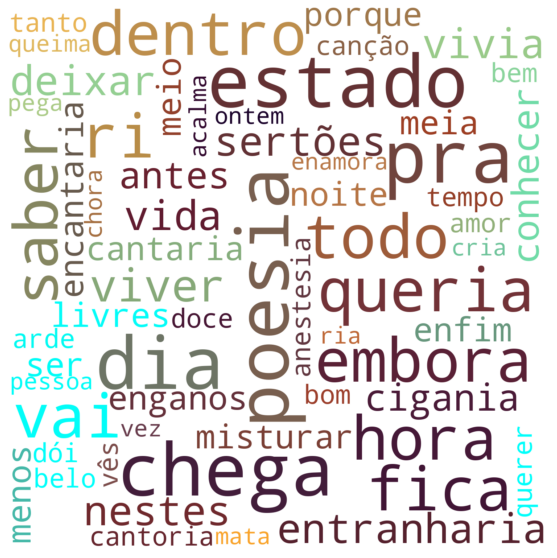

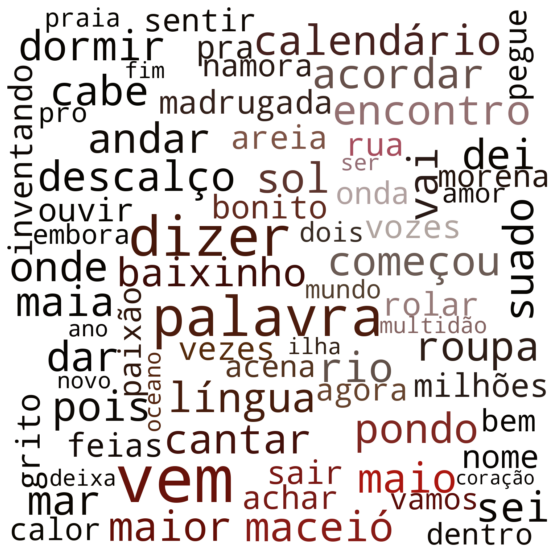

In [11]:
for index, row in song_df.iterrows():
    visualize.cria_nuvem_capa(row.letra, row.url_album_capa, stop)